---
## Observations and Insights 
---
* Capomulin and Ramicane are the most effective treatments, as they had better overall survival *(Fig 1)*.
---
* This is likely due to the fact that they were the most effective at shrinking tumors *(Fig 3)*.
---
* It makes logical sense that tumor volume and weight would correlate, as the tumors themselves hold mass *(Fig 6)*. A more interesting plot might have been weight (minus tumor mass) over time per drug. This would tell you how the drug impacts the weight of the mouse outside of shrinking the tumors. A drug that significantly reduces weight would require additional monitoring / possible intervention by the clinical team.
---

In [1]:
# dependencies and setup
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import scipy.stats as st
import numpy as np

# study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# combine the data into a single dataset
studydf = pd.merge(mouse_metadata, study_results,how='left', on="Mouse ID")
studydf.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# check the number of mice in the DataFrame
totm = studydf["Mouse ID"].nunique()
mouse_metadata_unique = mouse_metadata["Mouse ID"].nunique()
study_results_unique = study_results["Mouse ID"].nunique()

print(f'Total Mice: {totm}')

Total Mice: 249


In [3]:
# get the duplicate mice by ID number that shows up for Mouse ID and Timepoint
dupmice = studydf.loc[studydf.duplicated(subset=['Mouse ID', 'Timepoint',]),'Mouse ID'].unique()

# create a clean DataFrame by dropping the duplicate mouse by its ID
studydfcl = studydf[studydf['Mouse ID'].isin(dupmice)==False]

# check the number of mice in the clean DataFrame
totmcl = studydfcl["Mouse ID"].nunique()
print(f'Total Mice After Cleaning: {totmcl}')

Total Mice After Cleaning: 248


## Summary Statistics

In [4]:
# group the drugs
drggrp = studydfcl.groupby(['Drug Regimen'])

# math code
mean = drggrp["Tumor Volume (mm3)"].mean()
median = drggrp["Tumor Volume (mm3)"].median()
var = drggrp["Tumor Volume (mm3)"].var()
std = drggrp["Tumor Volume (mm3)"].std()
sem = drggrp["Tumor Volume (mm3)"].sem()

# set up the stats table
drgstats = pd.DataFrame({'Average':mean,'Median': median,
                        'Variance':var,'Standard Deviation':std,
                        'SEM':sem})
print('')
print("Stats for Tumor Volume (mm3) per Drug Regimen")
drgstats



Stats for Tumor Volume (mm3) per Drug Regimen


,Average,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar Plots

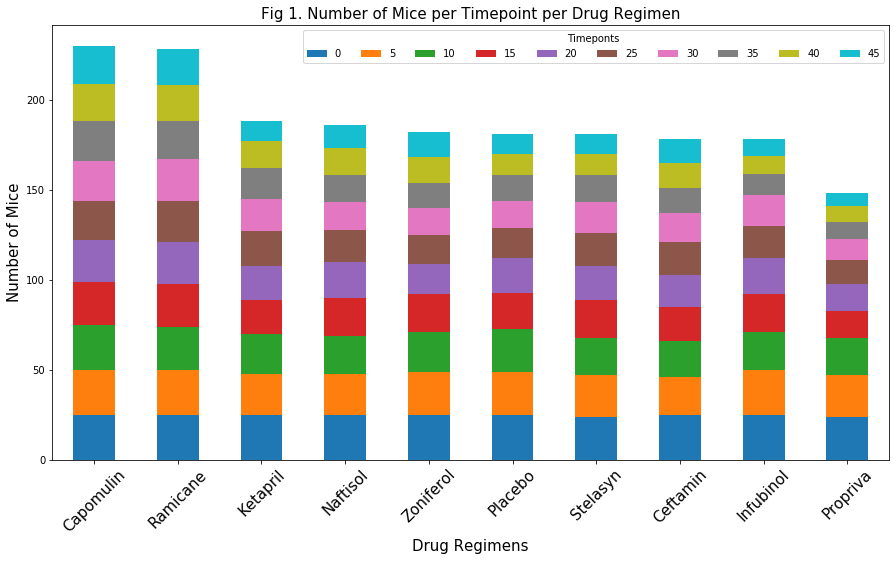

In [5]:
# pandas.DataFrame.plot Version

# set up the data we want to plot. 
timedf = studydfcl.groupby('Drug Regimen')['Timepoint'].value_counts().unstack()
timedf.columns = ['0', '5','10','15','20','25','30','35','40','45']
timedf = timedf.reset_index()

# sort the data for the plot later
timedf['totals'] = timedf.sum(axis=1)
timedf = timedf.sort_values(by=['totals'],ascending=False)

# plot
timeplot = timedf[['0', '5','10','15','20','25','30','35','40','45']].plot(kind="bar", stacked=True, 
                                                                           figsize=(15,8))

# set chart labels to look nice
timeplot.set_title("Fig 1. Number of Mice per Timepoint per Drug Regimen", fontsize=15)
timeplot.set_ylabel("Number of Mice", fontsize=15)
timeplot.set_xlabel("Drug Regimens", fontsize=15)
timeplot.set_xticklabels(timedf['Drug Regimen'], rotation=45, fontsize=15)

# had to cheat here, couldn't figure out how to do this without pyplot
plt.legend(title="Timeponts",ncol=10)
timeplot



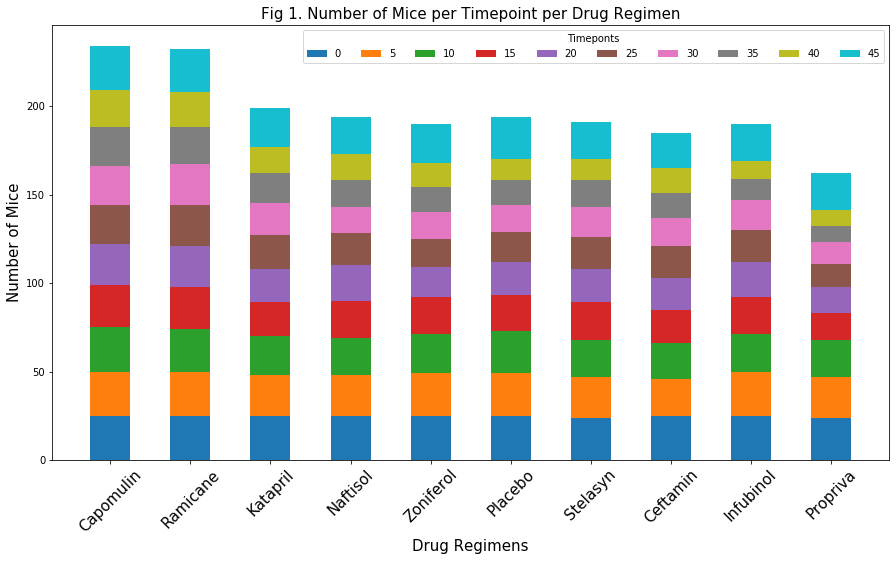

In [6]:
# pyplot Version

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(15,8)

# assign each timepoint to a variable
bars1 = np.array(timedf['0'])
bars2 = np.array(timedf['5'])
bars3 = np.array(timedf['10'])
bars4 = np.array(timedf['15'])
bars5 = np.array(timedf['20'])
bars6 = np.array(timedf['25'])
bars7 = np.array(timedf['30'])
bars8 = np.array(timedf['35'])
bars9 = np.array(timedf['40'])
bars10 = np.array(timedf['45'])
 
N = len(bars1)
ind = np.arange(N)
width=0.5
    
# Names of group
names = ['Capomulin','Ramicane','Katapril','Naftisol','Zoniferol','Placebo','Stelasyn','Ceftamin','Infubinol','Propriva']

 
p1 = plt.bar(ind,bars1, width,  color='tab:blue')
p2 = plt.bar(ind,bars2, width, bottom=bars1, color='tab:orange')
p3 = plt.bar(ind,bars3,width,bottom=bars1+bars2, color='tab:green')
p4 = plt.bar(ind,bars3,width,bottom=bars1+bars2+bars3, color='tab:red')
p5 = plt.bar(ind,bars3,width,bottom=bars1+bars2+bars3+bars4, color='tab:purple')
p6 = plt.bar(ind,bars3,width,bottom=bars1+bars2+bars3+bars4+bars5, color='tab:brown')
p7 = plt.bar(ind,bars3,width,bottom=bars1+bars2+bars3+bars4+bars5+bars6, color='tab:pink')
p8 = plt.bar(ind,bars3,width,bottom=bars1+bars2+bars3+bars4+bars5+bars6+bars7, color='tab:gray')
p9 = plt.bar(ind,bars3,width,bottom=bars1+bars2+bars3+bars4+bars5+bars6+bars7+bars8, color='tab:olive')
p10 = plt.bar(ind,bars3,width,bottom=bars1+bars2+bars3+bars4+bars5+bars6+bars7+bars8+bars9, color='tab:cyan')



plt.title("Fig 1. Number of Mice per Timepoint per Drug Regimen", fontsize=15)
plt.ylabel("Number of Mice", fontsize=15)
plt.xlabel("Drug Regimens", fontsize=15)
plt.xticks(ind, names, rotation=45, fontsize=15)
plt.legend((p1[0],p2[0],p3[0],p4[0],p5[0],p6[0],p7[0],p8[0],p9[0],p10[0]),('0', '5','10','15','20','25','30','35','40','45'),
            title="Timeponts",ncol=10)
plt.show()


## Pie Plots

Text(0, 0.5, '')

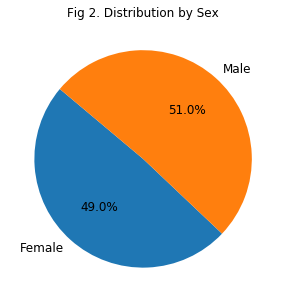

In [7]:
# pandas.DataFrame.plot Version

# set up the data we want to plot. 
sexdf = studydfcl.groupby(['Sex'])['Sex'].agg("count")
sexdf.columns = ['count']

# plot code
pieplot = sexdf.plot.pie(figsize=(5, 5), autopct="%1.1f%%", startangle=140, title="Fig 2. Distribution by Sex", fontsize=12)

#remove extraneous label
pieplot.set_ylabel("")

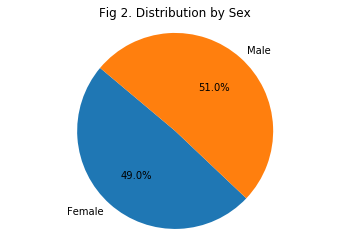

In [8]:
# pyplot Version

# set up controls
labels = ['Female','Male']
explode = (0,0)

# code the plot
plt.pie(sexdf, explode=explode, labels=labels,
        autopct="%1.1f%%", startangle=140)
plt.axis("equal")

# update label
plt.title('Fig 2. Distribution by Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [9]:
# set up the data we want to analyze 
top4dr = studydfcl.loc[(studydfcl["Drug Regimen"] == "Capomulin") | (studydfcl["Drug Regimen"] == "Ramicane") |
                         (studydfcl["Drug Regimen"] == "Infubinol") | (studydfcl["Drug Regimen"] == "Ceftamin"), :]

# remove duplicates by sorting last Timpepoint to top, then dropping duplicates
top4dr = top4dr.sort_values("Timepoint", ascending = False)
top4dr = top4dr.drop_duplicates(subset="Mouse ID", keep='first')
    
# determine quartiles
quartiles = top4dr['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

# determine upper and lower bounds
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

# print a filtered dataframe of any outliers
outcheck = top4dr.loc[(top4dr['Tumor Volume (mm3)'] > upper_bound) | (top4dr['Tumor Volume (mm3)'] < lower_bound), :]
outcheck


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites


* Per above quantitative analysis, there are no outliers when the data is analyzed as a whole

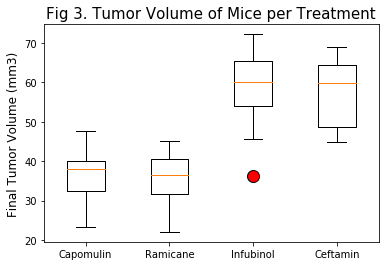

In [10]:
# isolate plot data
capvol = top4dr.loc[top4dr["Drug Regimen"] == "Capomulin", 'Tumor Volume (mm3)']
ramvol = top4dr.loc[top4dr["Drug Regimen"] == "Ramicane", 'Tumor Volume (mm3)']
infvol = top4dr.loc[top4dr["Drug Regimen"] == "Infubinol", 'Tumor Volume (mm3)']
cefvol = top4dr.loc[top4dr["Drug Regimen"] == "Ceftamin", 'Tumor Volume (mm3)']

# plot code
fig, ax = plt.subplots()
bxpl = plt.boxplot([capvol,ramvol,infvol,cefvol])
fig.canvas.draw()

# set up labels
plt.title('Fig 3. Tumor Volume of Mice per Treatment', fontsize=15)
plt.ylabel('Final Tumor Volume (mm3)', fontsize=12)

# change the x labels from numeric to drug names 
xlab = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
labels = [item.get_text() for item in ax.get_xticklabels()]
labels = xlab
ax.set_xticklabels(labels)

# change the outlier marker to highlight it
plt.setp(bxpl['fliers'], markerfacecolor='red', markersize=12)

# show the plot
plt.show()

## Line and Scatter Plots

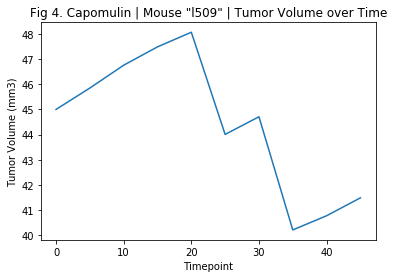

In [11]:
# isolate plot data
capdf = studydfcl.loc[(studydfcl["Drug Regimen"] == "Capomulin"),:]

# set variables for patient "l509"
captp = capdf.loc[capdf["Mouse ID"] == "l509","Timepoint"]
captv = capdf.loc[capdf["Mouse ID"] == "l509","Tumor Volume (mm3)"]

# plot code / labels
mol509 = plt.plot(captp, captv)
plt.title('Fig 4. Capomulin | Mouse "l509" | Tumor Volume over Time')
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

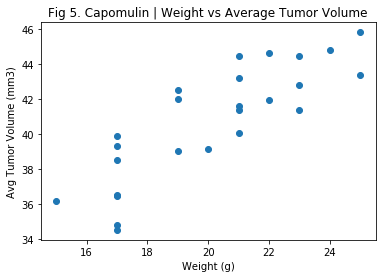

In [12]:
# set variables for the plot
avgwt = capdf.groupby(capdf["Mouse ID"])["Weight (g)"].mean()
avgtvol = capdf.groupby(capdf["Mouse ID"])["Tumor Volume (mm3)"].mean()

# plot code / labels
plt.scatter(avgwt,avgtvol)
plt.title('Fig 5. Capomulin | Weight vs Average Tumor Volume')
plt.xlabel("Weight (g)")
plt.ylabel("Avg Tumor Volume (mm3)")
plt.show()

## Correlation and Regression


The correlation between mouse weight and the average tumor volume is 0.84.


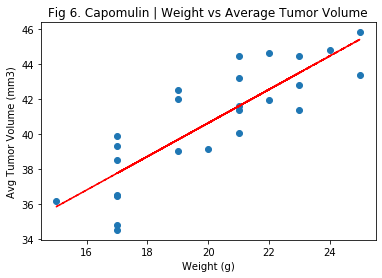

In [13]:
# space to make the readout below nicer :)
print('')

# caculate correlation coefficient
corr = round(st.pearsonr(avgwt, avgtvol)[0],2)
print(f'The correlation between mouse weight and the average tumor volume is {corr}.')

# linear regression code
slope, int, r, p, std_err = st.linregress(avgwt, avgtvol)
      
# set variable with equation of the line
fit = slope * avgwt + int

# base plot code
plt.scatter(avgwt,avgtvol,)
plt.title('Fig 6. Capomulin | Weight vs Average Tumor Volume')
plt.xlabel("Weight (g)")
plt.ylabel("Avg Tumor Volume (mm3)")

# plot the fit line
plt.plot(avgwt,fit,'--',color='red')
plt.show()
